## Ordinary Least Squares using statsmodels
- Check Linearity
- Check distribution of variables
- OLS modelling 
- Check model summary
- Visual residuals / errors
- Check normality

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
plt.style.use('seaborn')

In [34]:
h_w = pd.read_csv('data/height_weight.csv').drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [35]:
h_w

,height,weight
0,150,45
1,160,50
2,162,51
3,155,50
4,168,55
5,170,55
6,172,60
7,173,60
8,174,65
9,171,65


### Check Linearity

Text(0.5, 1.0, 'Linearity Check')

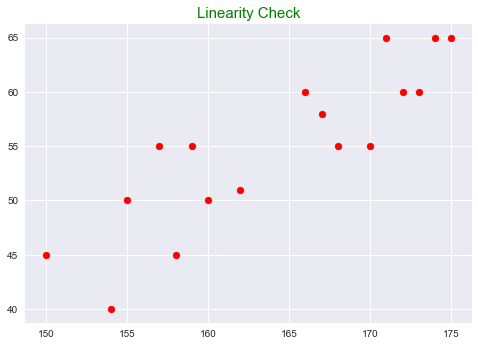

In [36]:
plt.scatter(h_w.height, h_w.weight, color='red')
plt.title('Linearity Check', fontsize=15, color='green')

### Check distributions of variables

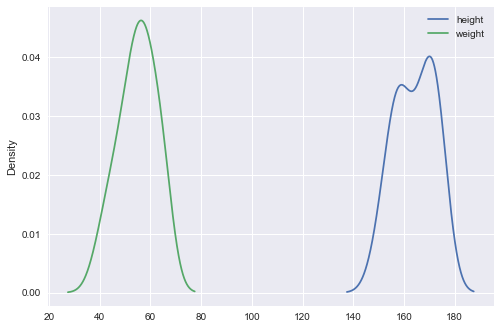

In [37]:
h_w.plot.kde()

### Statsmodel

In [42]:
f = 'weight~height'
model = ols(formula=f, data=h_w).fit()

In [39]:
model.summary()

/Users/victor/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     46.19
Date:                Tue, 18 Aug 2020   Prob (F-statistic):           6.03e-06
Time:                        16:44:02   Log-Likelihood:                -46.689
No. Observations:                  17   AIC:                             97.38
Df Residuals:                      15   BIC:                             99.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    113.4905      7.521     15.090      0.000      97.460     129.521
weight         0.9225      0.136      6.797      0.000       0.633       1.212
==============================================================================
Omnibus:                        1.955   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.376   Jarque-Bera (JB):                1.238
Skew:                          -0.387   Prob(JB):                        0.539
Kurtosis:                       1.929   Cond. No.                         428.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Statsmodel summary explanation

**Here is a brief description of these measures:**

The left part of the first table gives some specifics on the data and the model:

* **Dep. Variable**: Singular. Which variable is the point of interest of the model
* **Model**: Technique used, an abbreviated version of Method (see methods for more).
* **Method**: The loss function optimized in the parameter selection process. Least Squares since it picks the parameters that reduce the training error. This is also known as Mean Square Error [MSE].
* **No. Observations**: The number of observations used by the model, or size of the training data.
* **Degrees of Freedom Residuals**: Degrees of freedom of the residuals, which is the number of observations – number of parameters. Intercept is a parameter. The purpose of Degrees of Freedom is to reflect the impact of descriptive/summarizing statistics in the model, which in regression is the coefficient. Since the observations must "live up" to these parameters, they only have so many free observations, and the rest must be reserved to "live up" to the parameters' prophecy. This internal mechanism ensures that there are enough observations to match the parameters.
* **Degrees of Freedom Model**: The number of parameters in the model (not including the constant/intercept term if present)
* **Covariance Type**: Robust regression methods are designed to be not overly affected by violations of assumptions by the underlying data-generating process. Since this model is Ordinary Least Squares, it is non-robust and therefore highly sensitive to outliers.

The right part of the first table shows the goodness of fit 

* **R-squared**: The coefficient of determination, the Sum Squares of Regression divided by Total Sum Squares. This translates to the percent of variance explained by the model. The remaining percentage represents the variance explained by error, the E term, the part that model and predictors fail to grasp.
* **Adj. R-squared**: Version of the R-Squared that penalizes additional independent variables. 
* **F-statistic**: A measure of how significant the fit is. The mean squared error of the model divided by the mean squared error of the residuals. Feeds into the calculation of the P-Value.
* **Prob (F-statistic) or P-Value**: The probability that a sample like this would yield the above statistic, and whether the model's verdict on the null hypothesis will consistently represent the population. Does not measure effect magnitude, instead measures the integrity and consistency of this test on this group of data.
* **Log-likelihood**: The log of the likelihood function.
* **AIC**: The Akaike Information Criterion. Adjusts the log-likelihood based on the number of observations and the complexity of the model. Penalizes the model selection metrics when more independent variables are added.
* **BIC**: The Bayesian Information Criterion. Similar to the AIC, but has a higher penalty for models with more parameters. Penalizes the model selection metrics when more independent variables are added.

Second Table: Coefficient Reports 

* **coef**: The estimated value of the coefficient. By how much the model multiplies the independent value by.
* **std err**: The basic standard error of the estimate of the coefficient. Average distance deviation of the points from the model, which offers a unit relevant way to gauge model accuracy.
* **t**: The t-statistic value. This is a measure of how statistically significant the coefficient is.
* **P > |t|**: P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response.
* **[95.0% Conf. Interval]**: The lower and upper values of the 95% confidence interval. Specific range of the possible coefficient values.

Third Table: Residuals, Autocorrelation, and Multicollinearity 

* **Skewness**: A measure of the symmetry of the data about the mean. Normally-distributed errors should be symmetrically distributed about the mean (equal amounts above and below the line). The normal distribution has 0 skew.
* **Kurtosis**: A measure of the shape of the distribution. Compares the amount of data close to the mean with those far away from the mean (in the tails), so model "peakiness". The normal distribution has a Kurtosis of 3, and the greater the number, the more the curve peaks.
* **Omnibus D’Angostino’s test**: It provides a combined statistical test for the presence of skewness and kurtosis.
* **Prob(Omnibus)**: The above statistic turned into a probability
* **Jarque-Bera**: A different test of the skewness and kurtosis
* **Prob (JB)**: The above statistic turned into a probability
* **Durbin-Watson**: A test for the presence of autocorrelation (that the errors are not independent), which is often important in time-series analysis
* **Cond. No**: A test for multicollinearity (if in a fit with multiple parameters, the parameters are related to each other).

#### Visualise error terms

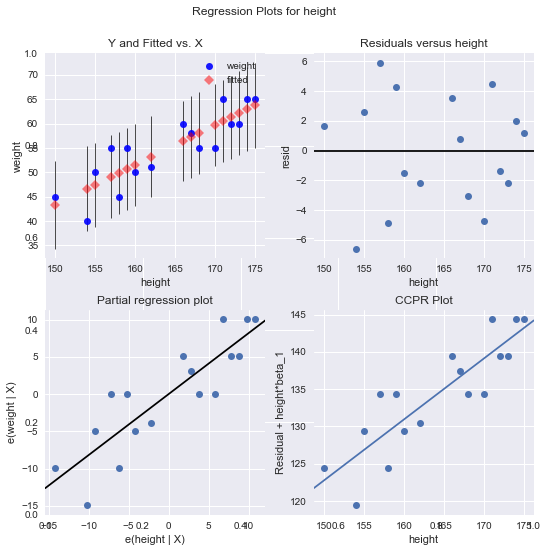

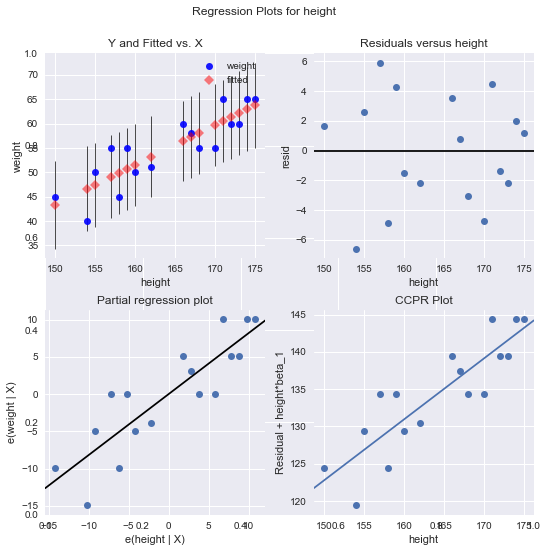

In [45]:
fig, ax = plt.subplots(figsize=(8,8))
sm.graphics.plot_regress_exog(model, 'height', fig=fig)

#### QQ Plot - Check Normality

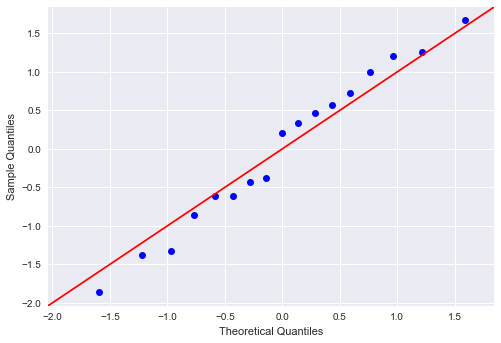

In [51]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

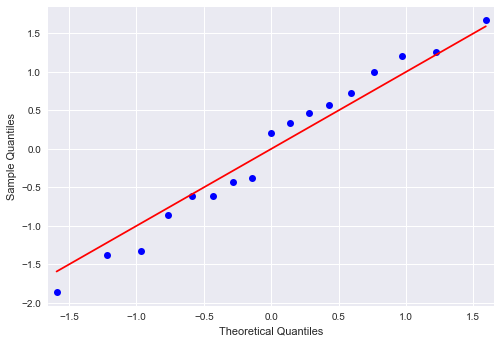

In [52]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='s', fit=True)

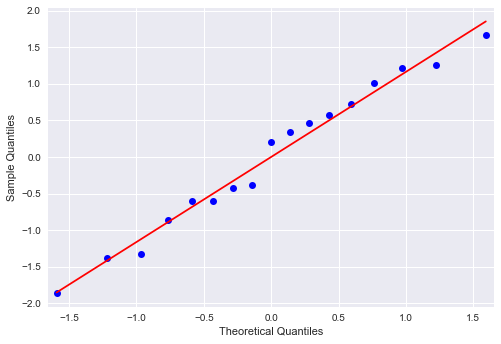

In [53]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='r', fit=True)

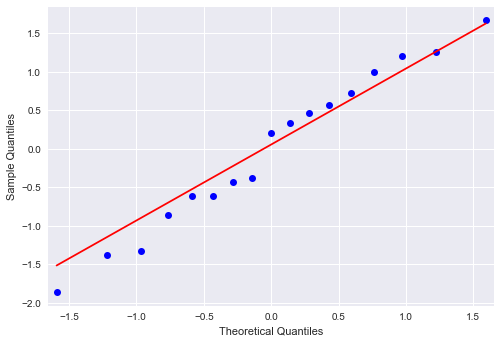

In [54]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='q', fit=True)